In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("mnist_train_data.csv")
dfy = pd.read_csv("mnist_test_data.csv")

In [3]:
print(dfx.shape , dfy.shape)
print(type(dfx))

(60000, 784) (60000, 1)
<class 'pandas.core.frame.DataFrame'>


In [4]:
dfx.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dfy.head()

,label
0,5
1,0
2,4
3,1
4,9


# Step 1: Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
dfx_fitT = sc.fit_transform(dfx)

In [9]:
dfx_fitT.shape

(60000, 784)

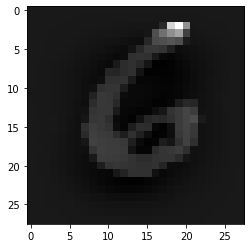

In [10]:
plt.imshow(dfx_fitT[90].reshape(28,28), cmap = "gray")

# Sklearn PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2,)

In [13]:
dfx_fitT.shape

(60000, 784)

In [14]:
z_pca= pca.fit_transform(dfx_fitT)

In [15]:
z_pca.shape

(60000, 2)

In [16]:
z_pca

array([[-0.92225049, -4.8152961 ],
       [ 8.70899962, -7.75422639],
       [ 2.32829693,  9.43221148],
       ...,
       [-3.7772054 , -3.2306299 ],
       [ 1.72238012, -4.94788235],
       [-1.42711053, -6.17559843]])

In [17]:
pca.explained_variance_

array([40.4876351 , 29.24169745])

- Pca.explained_variance => z_pca[0] explains the 40% of the original variance of the total data pca[1] explaines the 29% of the original variance of the original data. Overall they are explpaining around 70% of the original data
- Original data had 100% spread or variance, the new data which has lesser dimensions is having 70% spread or variance. WHich means we are having only 70% of the original data.
- We can say that we have compressed the original data into 2 Dimensions but have also lost 30% of the original data/information

# Custom PCA

# Step 2: Compute Covariance Matrix

In [18]:
covariance_matrix = np.dot(dfx_fitT.T,dfx)

In [19]:
covariance_matrix.shape

(784, 784)

In [20]:
covariance_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Step 3: Compute eigen vectors using SVD

In [21]:
from numpy.linalg import svd

In [22]:
u,s,v = svd(covariance_matrix)

In [23]:
u.shape

(784, 784)

In [39]:
ured = u[:, :2]

In [40]:
ured.shape

(784, 2)

# Step 4: Projection of Data on New Axis(Components)

In [41]:
z = np.dot(dfx_fitT,ured)

In [42]:
z.shape

(60000, 2)

In [44]:
z

array([[-0.06179595,  3.4777616 ],
       [ 9.6322538 ,  3.23201159],
       [ 1.19774534, -8.16829421],
       ...,
       [-2.81182931, -0.70022867],
       [ 1.83873689,  2.63046265],
       [-1.40275301,  2.23260196]])

# Visualize the data

In [47]:
type(dfy), type(dfx)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [52]:
# To Convert dfy into numpy array
# dfy = dfy.to_numpy()

In [53]:
type(dfy)

numpy.ndarray

In [56]:
new_dataset = np.hstack((z, dfy.reshape(-1,1)))

In [57]:
dataframe = pd.DataFrame(new_dataset, columns = ['PC1', 'PC2', "label"])

In [59]:
dataframe.head()

,PC1,PC2,label
0,-0.061796,3.477762,5.0
1,9.632254,3.232012,0.0
2,1.197745,-8.168294,4.0
3,-7.297427,6.060066,1.0
4,-4.892827,-7.373369,9.0


- This PC1 and PC2 (Principal Components) are not representing any feature about the features in the dataset.
- But these (Principal Components) can  be a combination of multiple features, thats y we never say what does the principal components say about the whole dataset.

In [60]:
import seaborn as sns

<Figure size 2160x2160 with 0 Axes>

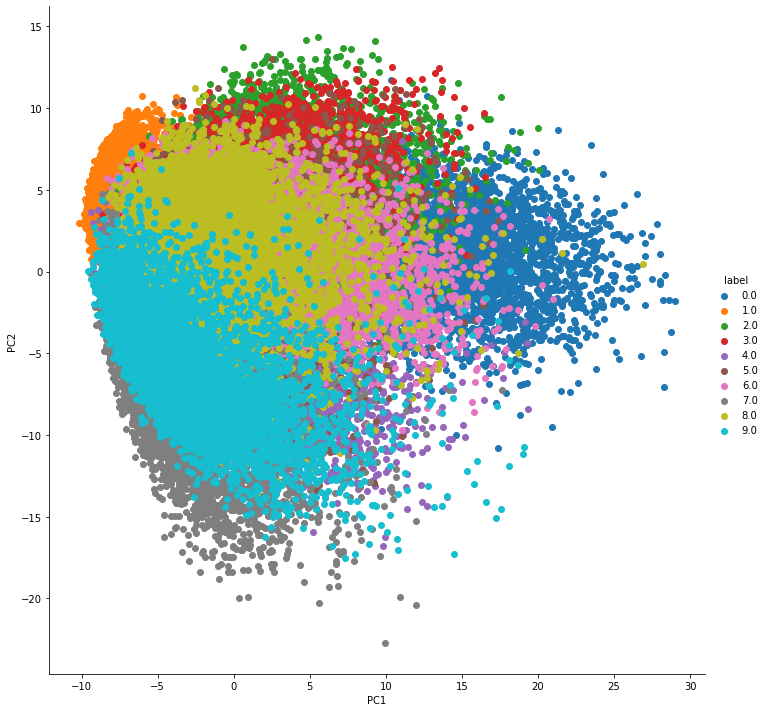

In [63]:
plt.figure(figsize = (30,30))
fg = sns.FacetGrid(dataframe, hue = "label", height = 10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# PCA with 784 dimensions

In [64]:
pca = PCA()

In [65]:
z_pca = pca.fit_transform(dfx_fitT)

In [66]:
z_pca.shape

(60000, 784)

In [67]:
pca.explained_variance_

array([4.04876351e+01, 2.92416975e+01, 2.68118045e+01, 2.06866182e+01,
       1.80766501e+01, 1.57331779e+01, 1.37906091e+01, 1.25175891e+01,
       1.10067953e+01, 1.00504971e+01, 9.62045779e+00, 8.63097356e+00,
       7.99159687e+00, 7.81488215e+00, 7.37553786e+00, 7.13058751e+00,
       6.71398002e+00, 6.60400749e+00, 6.40604846e+00, 6.23737743e+00,
       5.93229172e+00, 5.76059855e+00, 5.48403364e+00, 5.31859721e+00,
       5.12873534e+00, 4.96062446e+00, 4.90533662e+00, 4.70843497e+00,
       4.52919760e+00, 4.39470849e+00, 4.27522172e+00, 4.21399693e+00,
       4.09838079e+00, 4.03181137e+00, 3.97713624e+00, 3.86052409e+00,
       3.80864021e+00, 3.72563426e+00, 3.64393543e+00, 3.44169730e+00,
       3.41624517e+00, 3.36378527e+00, 3.25773631e+00, 3.23620323e+00,
       3.20478100e+00, 3.17911021e+00, 3.14205728e+00, 3.08588859e+00,
       3.06076556e+00, 3.03759974e+00, 2.90171955e+00, 2.86408562e+00,
       2.84980787e+00, 2.82374220e+00, 2.76632955e+00, 2.71778127e+00,
      

In [75]:
pca.explained_variance_ / np.sum(pca.explained_variance_)

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

In [76]:
pca.explained_variance_ratio_

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

In [77]:
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)

In [78]:
cumulative_variance_explained

array([0.05646717, 0.09724989, 0.13464369, 0.16349484, 0.18870593,
       0.21064863, 0.22988207, 0.24734006, 0.26269099, 0.27670818,
       0.29012561, 0.30216303, 0.31330873, 0.32420796, 0.33449446,
       0.34443932, 0.35380315, 0.36301361, 0.37194798, 0.3806471 ,
       0.38892074, 0.39695491, 0.40460336, 0.41202109, 0.41917402,
       0.42609249, 0.43293384, 0.43950059, 0.44581736, 0.45194656,
       0.45790911, 0.46378627, 0.46950219, 0.47512526, 0.48067208,
       0.48605627, 0.49136809, 0.49656415, 0.50164626, 0.50644631,
       0.51121087, 0.51590227, 0.52044576, 0.52495921, 0.52942885,
       0.53386268, 0.53824483, 0.54254865, 0.54681743, 0.5510539 ,
       0.55510086, 0.55909534, 0.5630699 , 0.56700811, 0.57086624,
       0.57465667, 0.57841069, 0.58211845, 0.5857679 , 0.5893609 ,
       0.59288472, 0.59636266, 0.59980677, 0.60320546, 0.606565  ,
       0.60991386, 0.6132325 , 0.61646276, 0.61962553, 0.62275797,
       0.62586528, 0.62893771, 0.63198685, 0.63501403, 0.63800

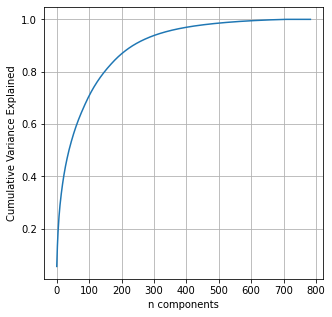

In [82]:
plt.figure(figsize = (5,5))
plt.plot(cumulative_variance_explained)
plt.grid()
plt.xlabel("n components")
plt.ylabel("Cumulative Variance Explained")
plt.show()